In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs=16

In [0]:
folder = 'Lamborghini'
file = 'Lamb.txt'

In [0]:
folder = 'Mclaren'
file = 'Mclaren.txt'

In [0]:
folder = 'Jagaur'
file = 'Jagaur.txt'

In [0]:
path = Path(base_dir + 'data/Cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamb.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamborghini'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/models')]

In [0]:
classes = ['Lamborghini','Jagaur','Mclaren']

In [17]:
download_images(path/file, dest, max_pics=100,max_workers=0 )

Error https://www.autoguide.com/blog/wp-content/uploads/2019/02/JagCX75BondCarImage23101530.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fd584b576d8>: Failed to establish a new connection: [Errno 111] Connection refused',))


In [18]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

Lamborghini


Jagaur


Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=204

cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur/00000090.jpg'>
Mclaren


Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 52330), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=65, family=AddressFamily.AF_INET, type=204

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224,bs=bs//2, num_workers=4).normalize(imagenet_stats)

In [22]:
data.classes

['Jagaur', 'Lamborghini', 'Mclaren']

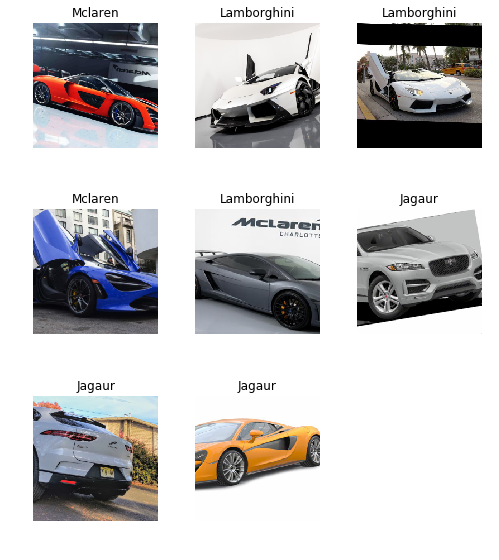

In [23]:
data.show_batch(rows=3, figsize=(7,8))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Jagaur', 'Lamborghini', 'Mclaren'], 3, 255, 63)

In [25]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 112451196.65it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


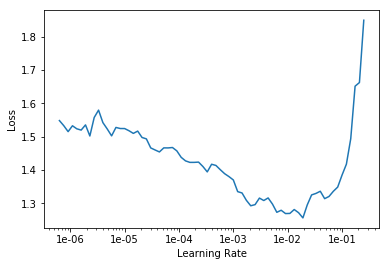

In [26]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.323398,0.928241,0.301587,00:23
1,1.066933,1.003783,0.301587,00:20
2,0.854288,0.788644,0.365079,00:20
3,0.777957,0.741036,0.285714,00:20


In [0]:
learn.save('stage-1-50')

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,1.162689,1.825835,0.460317,00:21
1,1.062691,0.801072,0.301587,00:21


In [30]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (255 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lamborghini,Lamborghini,Lamborghini,Lamborghini,Lamborghini
Path: /content/gdrive/My Drive/fastai-v3/data/Cars;

Valid: LabelList (63 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lamborghini,Jagaur,Lamborghini,Jagaur,Lamborghini
Path: /content/gdrive/My Drive/fastai-v3/data/Cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [32]:
interp.most_confused(min_val=2)

[('Mclaren', 'Lamborghini', 6),
 ('Jagaur', 'Lamborghini', 4),
 ('Lamborghini', 'Mclaren', 3),
 ('Jagaur', 'Mclaren', 2),
 ('Mclaren', 'Jagaur', 2)]

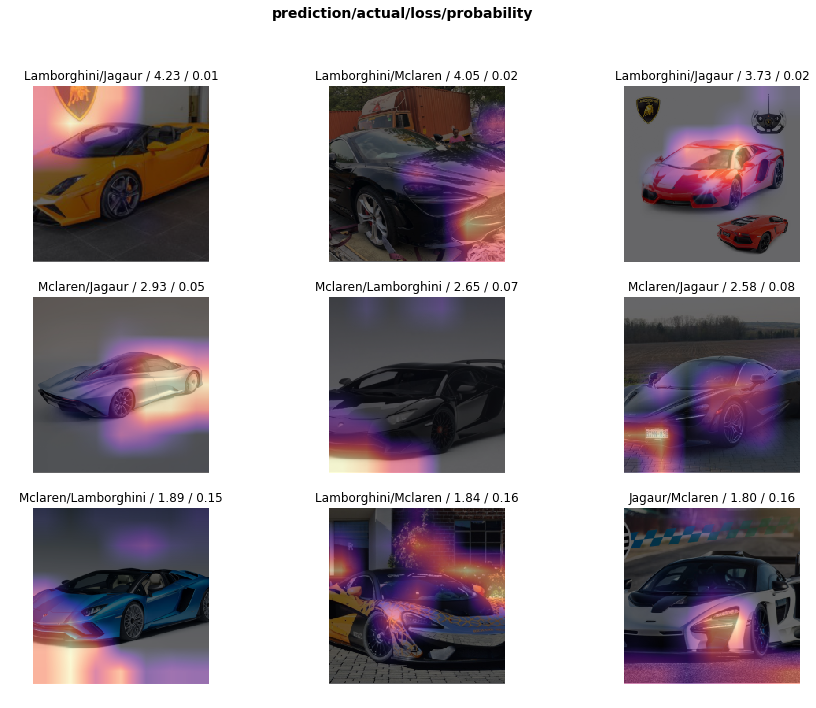

In [33]:
interp.plot_top_losses(9, figsize=(15,11))

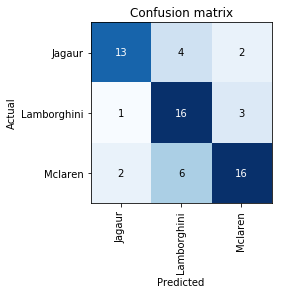

In [34]:
interp.plot_confusion_matrix()